In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [3]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
plt.style.use('bmh')

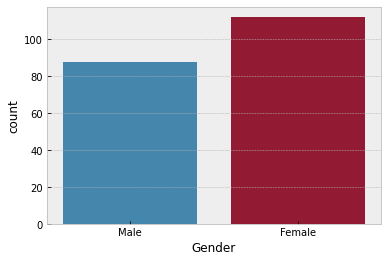

In [7]:
sns.countplot(data=customers , x='Gender');

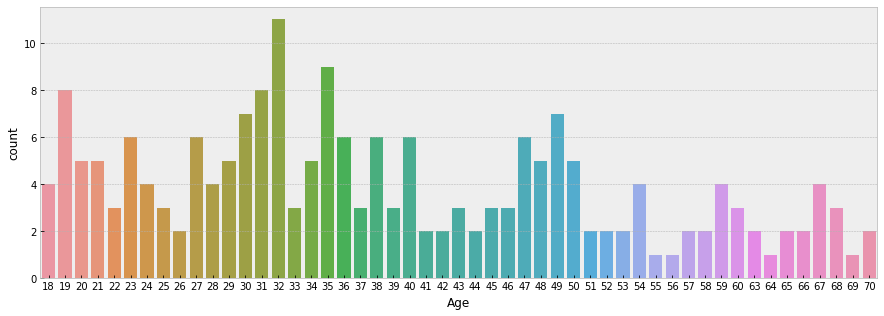

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data=customers , x='Age');

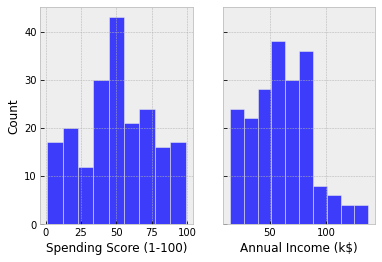

In [9]:
fig , ax=plt.subplots(1,2 , sharey=True)
sns.histplot(customers['Spending Score (1-100)'] , ax=ax[0])
sns.histplot(customers['Annual Income (k$)'] , ax=ax[1]);

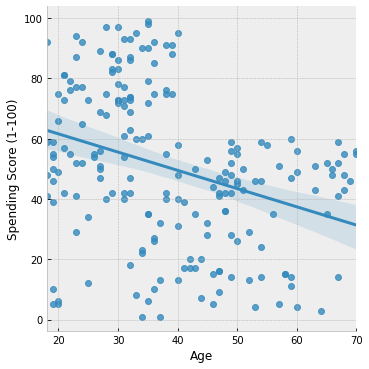

In [10]:
sns.lmplot(data=customers , y='Spending Score (1-100)' , x='Age');

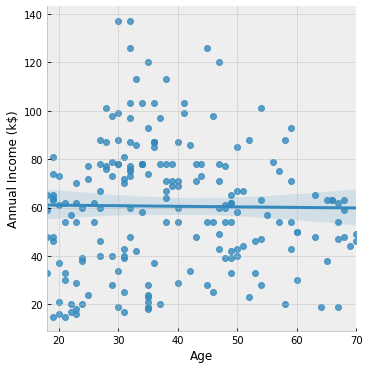

In [11]:
sns.lmplot(data=customers , y='Annual Income (k$)' , x='Age');

# Prediction

In [12]:
features = customers[['Spending Score (1-100)' , 'Annual Income (k$)']]

In [13]:
inertia = []
for i in range(1,11) :
    model = KMeans(n_clusters=i)
    model.fit(features)
    inertia.append(model.inertia_)

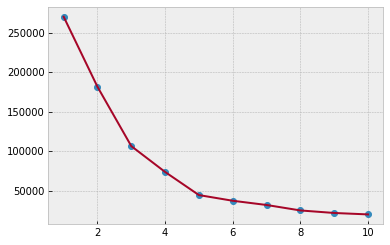

In [14]:
plt.plot(np.arange(1,11) , inertia , 'o')
plt.plot(np.arange(1,11) , inertia , '-')

In [15]:
model = KMeans(n_clusters=5)
model.fit(features)

KMeans(n_clusters=5)

In [16]:
model.cluster_centers_

array([[20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

In [17]:
pred = model.predict(features)

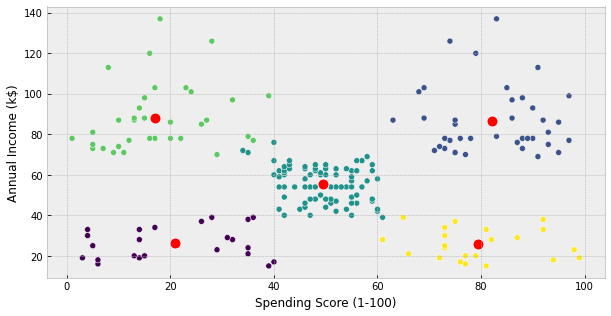

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=features , x='Spending Score (1-100)' , y='Annual Income (k$)' , c= pred )
sns.scatterplot(x=model.cluster_centers_[:,0] , y=model.cluster_centers_[:,1] , color='red' , s=120);